In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/diamonds.csv', index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

In [4]:
#using only 50% of data
#
data = data.sample(frac= 0.8)
data.shape

(43152, 10)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
23000,1.20,Ideal,D,VS1,61.0,59.0,11053,6.79,6.85,4.16
28908,0.30,Very Good,H,VVS1,62.0,59.0,684,4.26,4.29,2.65
5859,0.91,Premium,H,VS2,59.6,60.0,3921,6.25,6.29,3.74
6422,0.80,Ideal,F,VS2,62.1,56.0,4043,5.93,5.98,3.70
10269,1.01,Ideal,E,SI2,59.2,56.0,4751,6.63,6.59,3.91


In [6]:
#reset index to start from 0

data.reset_index(inplace= True, drop= True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.20,Ideal,D,VS1,61.0,59.0,11053,6.79,6.85,4.16
1,0.30,Very Good,H,VVS1,62.0,59.0,684,4.26,4.29,2.65
2,0.91,Premium,H,VS2,59.6,60.0,3921,6.25,6.29,3.74
3,0.80,Ideal,F,VS2,62.1,56.0,4043,5.93,5.98,3.70
4,1.01,Ideal,E,SI2,59.2,56.0,4751,6.63,6.59,3.91


In [7]:
data_corr = data.corr()
data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027252,0.183920,0.921296,0.975654,0.968562,0.950573
depth,0.027252,1.000000,-0.296995,-0.012501,-0.026054,-0.029002,0.094269
table,0.183920,-0.296995,1.000000,0.130509,0.198475,0.190119,0.153029
price,0.921296,-0.012501,0.130509,1.000000,0.884904,0.880960,0.858489
x,0.975654,-0.026054,0.198475,0.884904,1.000000,0.991636,0.967236
y,0.968562,-0.029002,0.190119,0.880960,0.991636,1.000000,0.961751
z,0.950573,0.094269,0.153029,0.858489,0.967236,0.961751,1.000000


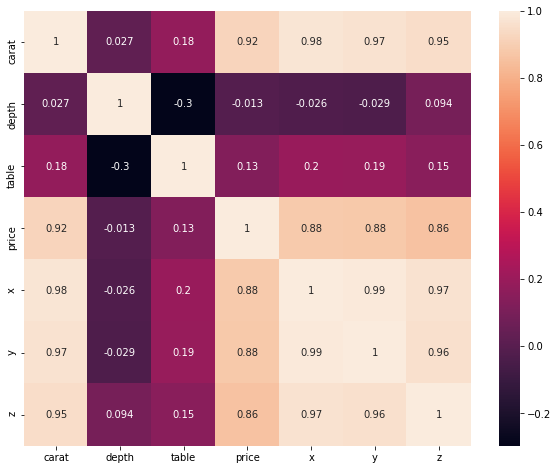

In [8]:
plt.subplots(figsize= (10,8))
sns.heatmap(data_corr, annot= True)
plt.show()

In [9]:
data['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [10]:
data['color'].unique()

array(['D', 'H', 'F', 'E', 'G', 'I', 'J'], dtype=object)

In [11]:
data['clarity'].unique()

array(['VS1', 'VVS1', 'VS2', 'SI2', 'SI1', 'VVS2', 'IF', 'I1'],
      dtype=object)

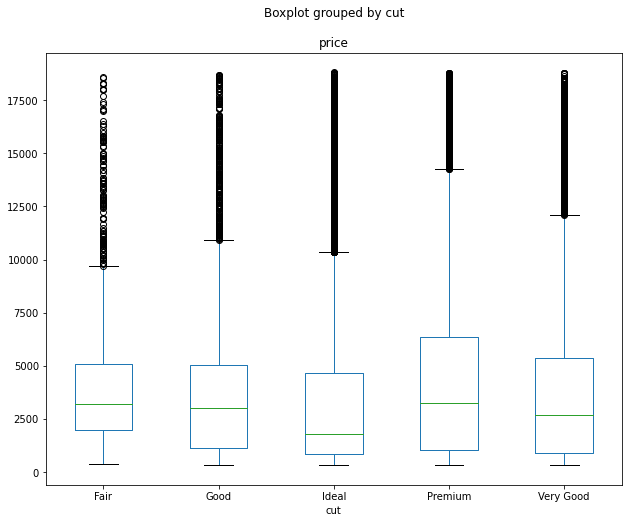

In [12]:
#box plot good for visualizing relationship of categorical data with other var

data.boxplot(by= 'cut', column= ['price'], grid = False, figsize= (10,8))

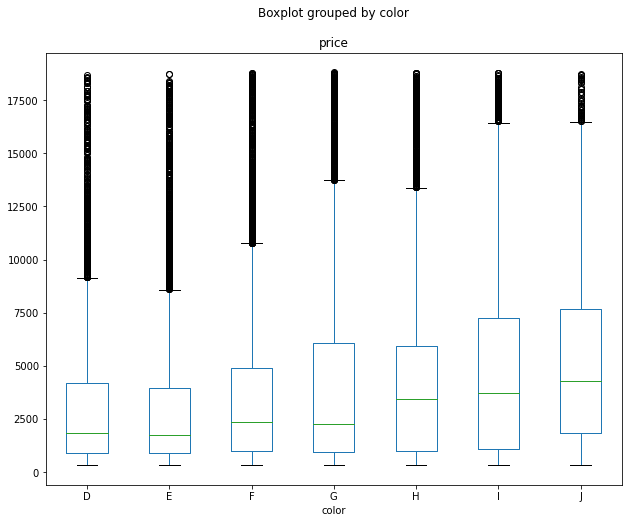

In [13]:
data.boxplot(by= 'color', column= ['price'], grid = False, figsize= (10,8))

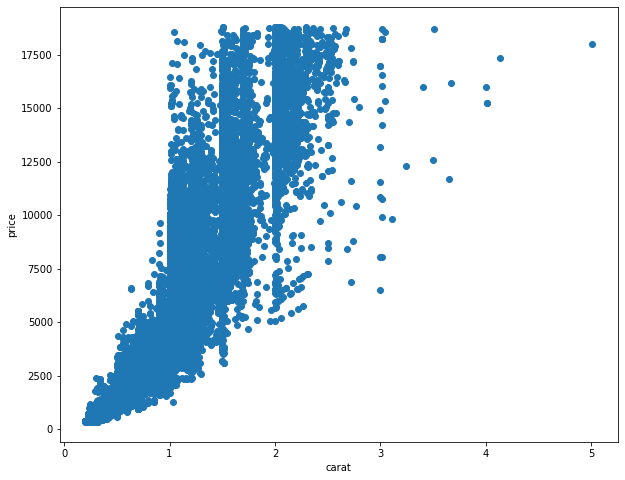

In [14]:
# scatter plot for non categorical data

plt.subplots(figsize = (10,8))
plt.scatter(data['carat'], data['price'])
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [15]:
#label encoding

clarity_dict = {'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 'SI1':2, 'SI2':1, 'I1':0 }

data['clarity'].replace(clarity_dict, inplace= True)

clarity_dict

{'IF': 7,
 'VVS1': 6,
 'VVS2': 5,
 'VS1': 4,
 'VS2': 3,
 'SI1': 2,
 'SI2': 1,
 'I1': 0}

In [16]:
#one hot encoding

data = pd.get_dummies(data, columns=['cut', 'color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.20,4,61.0,59.0,11053,6.79,6.85,4.16,0,0,1,0,0,1,0,0,0,0,0,0
1,0.30,6,62.0,59.0,684,4.26,4.29,2.65,0,0,0,0,1,0,0,0,0,1,0,0
2,0.91,3,59.6,60.0,3921,6.25,6.29,3.74,0,0,0,1,0,0,0,0,0,1,0,0
3,0.80,3,62.1,56.0,4043,5.93,5.98,3.70,0,0,1,0,0,0,0,1,0,0,0,0
4,1.01,1,59.2,56.0,4751,6.63,6.59,3.91,0,0,1,0,0,0,1,0,0,0,0,0


In [17]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_df = data[numeric_features]
numeric_df.describe()

,carat,depth,table,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797212,61.750987,57.454303,5.729403,5.731590,3.537715
std,0.473728,1.432703,2.235917,1.122267,1.120692,0.708356
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,31.800000,31.800000


In [18]:
#standardization

from sklearn.preprocessing import scale

numeric_arr = scale(numeric_df)
numeric_arr[:5]

array([[ 0.85026049, -0.52418127,  0.69131133,  0.94505994,  0.99797532,
         0.87850239],
       [-1.04958564,  0.17380834,  0.69131133, -1.3093314 , -1.28635445,
        -1.25321978],
       [ 0.23808785, -1.50136673,  1.13856037,  0.4638855 ,  0.49827818,
         0.28557305],
       [ 0.00588443,  0.2436073 , -0.6504358 ,  0.1787451 ,  0.22166012,
         0.22910359],
       [ 0.44918186, -1.78056257, -0.6504358 ,  0.80248973,  0.76597308,
         0.52556826]])

In [19]:
numeric_df = pd.DataFrame(numeric_arr, columns= numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04
mean,2.963888e-17,-1.621823e-15,-8.233022e-17,3.823415e-16,5.287247e-16,-4.742221e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.260680e+00,-1.308799e+01,-6.464673e+00,-5.105263e+00,-5.114391e+00,-4.994322e+00
25%,-8.384916e-01,-5.241813e-01,-6.504358e-01,-9.083527e-01,-9.026584e-01,-8.861683e-01
50%,-2.052096e-01,3.421042e-02,-2.031868e-01,-3.511021e-02,-1.926528e-02,-2.500899e-02
75%,5.125101e-01,5.228031e-01,6.913113e-01,7.222940e-01,7.213573e-01,7.090940e-01
max,8.892942e+00,1.203963e+01,1.679228e+01,4.464762e+00,2.326127e+01,3.989890e+01


In [20]:
data.drop(numeric_features, inplace= True, axis= 1)
data = pd.concat([data, numeric_df], axis=1)
data.shape

(43152, 20)

In [21]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,4,11053,0,0,1,0,0,1,0,0,0,0,0,0,0.850260,-0.524181,0.691311,0.945060,0.997975,0.878502
1,6,684,0,0,0,0,1,0,0,0,0,1,0,0,-1.049586,0.173808,0.691311,-1.309331,-1.286354,-1.253220
2,3,3921,0,0,0,1,0,0,0,0,0,1,0,0,0.238088,-1.501367,1.138560,0.463886,0.498278,0.285573
3,3,4043,0,0,1,0,0,0,0,1,0,0,0,0,0.005884,0.243607,-0.650436,0.178745,0.221660,0.229104
4,1,4751,0,0,1,0,0,0,1,0,0,0,0,0,0.449182,-1.780563,-0.650436,0.802490,0.765973,0.525568


In [22]:
data.to_csv('dataset/diamonds_processed.csv', index= False)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop('price', axis= 1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

y_pred = linear_reg.predict(x_test)
y_pred

array([  691.4189203 ,  2739.45990298,  4815.99841008, ...,
          11.19925534, -1189.12266795,  4329.16943455])

In [24]:
from sklearn.metrics import r2_score

print("Training score: ", linear_reg.score(x_train, y_train))

score = r2_score(y_test, y_pred)
print("testing score: ", score)

Training score:  0.91209829166845
testing score:  0.9005423109537815
